Best Parameters: {'C': 8, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy: 0.7333333333333333
Test Accuracy: 0.7523809523809524
Specificity: 0.6887
Accuracy: 0.7524
Sensitivity (Recall): 0.8173
Precision: 0.7203
F1 Score: 0.7658


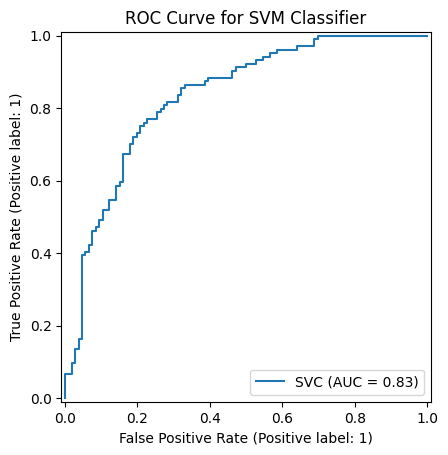

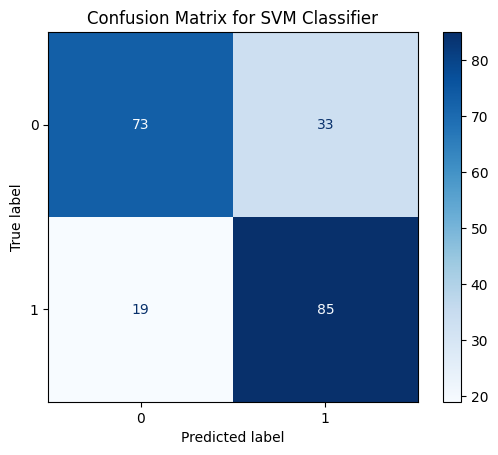

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing as pre
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

# Load Dataset
data = pd.read_csv('final-dataset.csv')

# Feature Selection
X = data.drop(columns=['Signal', 'Label', 'Hurst Component'])
y = data['Label']

# Split Data (70% Train, 15% Validation, 15% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# Standardize Features
scaler = pre.StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data
x_test = scaler.transform(x_test)  # Transform test set
x_val = scaler.transform(x_val)  # Transform validation set

# Hyperparameter Grid for SVM
parameters = {
    'C': range(1, 10),
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'degree': range(2, 5),
    'gamma': ('scale', 'auto')
}

# Initialize & Train SVM with GridSearchCV
clf = SVC(random_state=0)
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters Found
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Model Evaluation
val_score = best_model.score(x_val, y_val)
test_score = best_model.score(x_test, y_test)
print("Validation Accuracy:", val_score)
print("Test Accuracy:", test_score)

# Predictions
y_pred = best_model.predict(x_test)

# Confusion Matrix Calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Compute Metrics
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0

# Print Metrics
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve
RocCurveDisplay.from_estimator(best_model, x_test, y_test)
plt.title("ROC Curve for SVM Classifier")
plt.show()

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVM Classifier")
plt.show()
